In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
from scipy import stats

data = pd.read_csv('D:/Major Project/majorproject/Dataset/data.csv')

data.head()

y = data['diagnosis']

y.replace(to_replace='M',value= 1,inplace=True)
y.replace(to_replace='B',value = 0,inplace=True)

y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

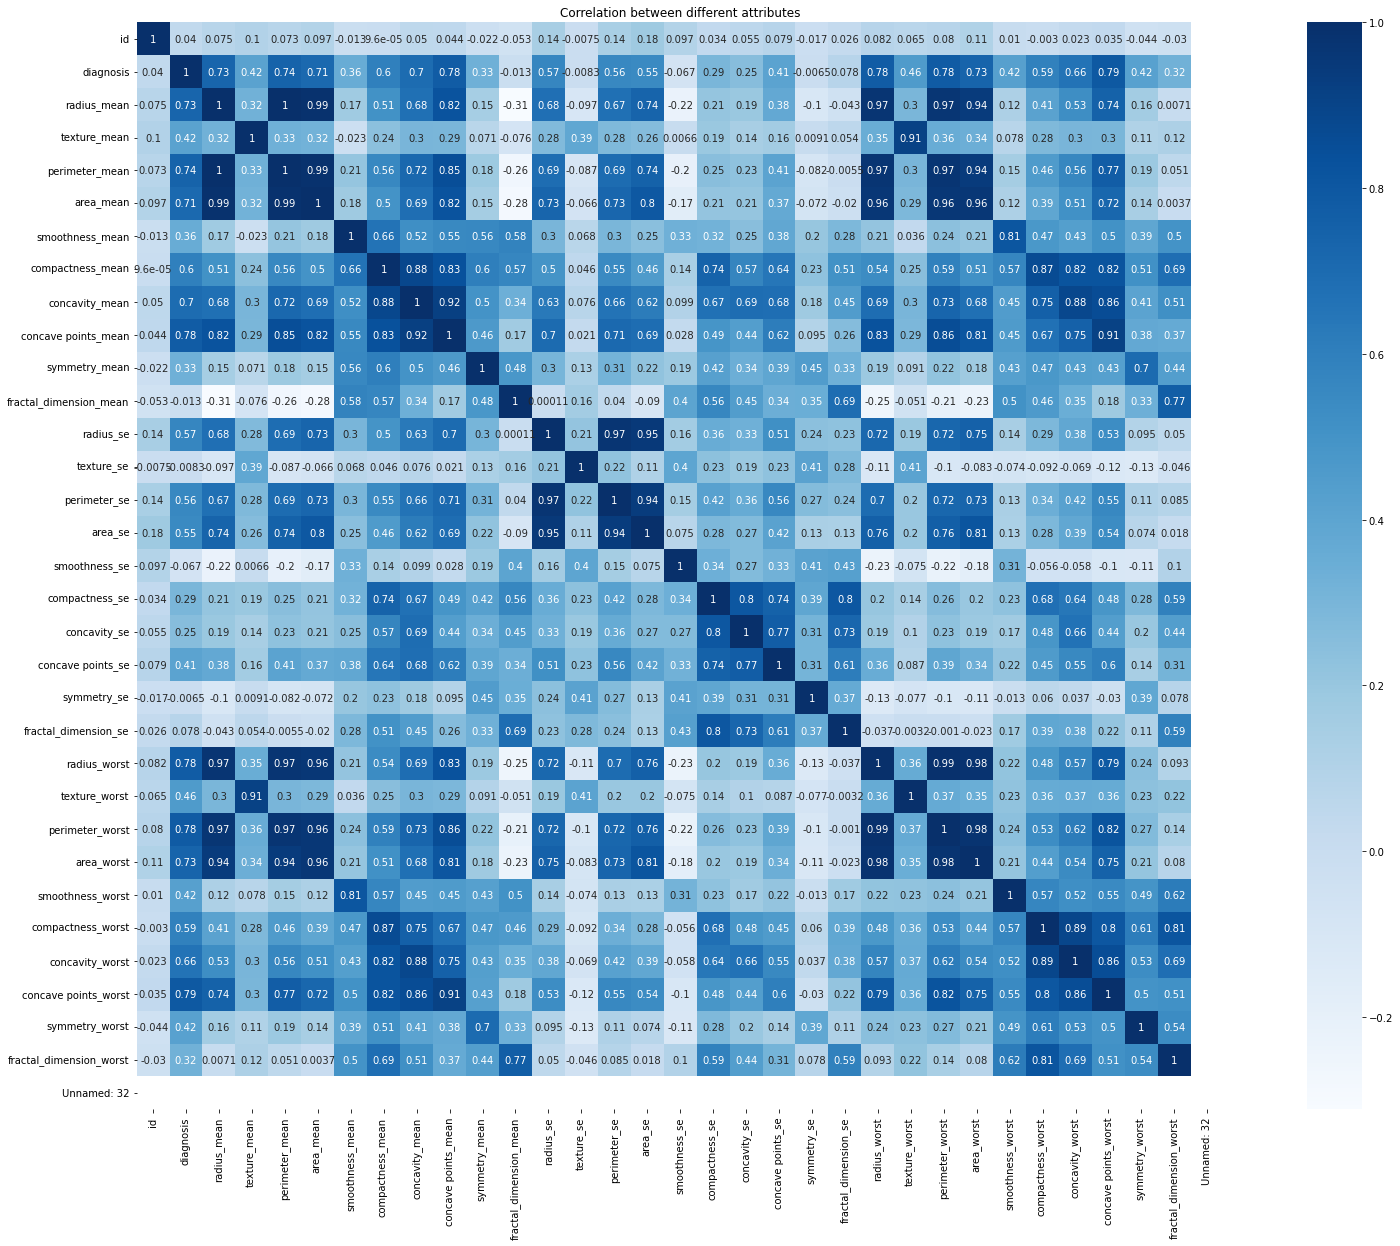

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(30,20))
cor = data.corr()
sns.heatmap(cor,vmax=1,square = True,annot=True, cmap=plt.cm.Blues)
plt.title('Correlation between different attributes')
plt.show()

In [5]:
x= data.drop(['id', 'diagnosis','Unnamed: 32'], axis = 1)
x

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [6]:
x.isnull().sum()
x.isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

**Feature Selection Using Genetic Algorithm**

In [7]:
from __future__ import print_function
from sklearn import datasets, linear_model
from genetic_selection import GeneticSelectionCV

In [8]:
estimators = linear_model.LogisticRegression(solver="liblinear", multi_class="ovr")

selectors = GeneticSelectionCV(estimators,
                                  cv=6,
                                  verbose=2,
                                  scoring="accuracy",
                                  max_features=30,
                                  n_population=60,
                                  crossover_proba=0.6,
                                  mutation_proba=0.2,
                                  n_generations=50,
                                  crossover_independent_proba=0.6,
                                  mutation_independent_proba=0.06,
                                  tournament_size=4,
                                  n_gen_no_change=20,
                                  caching=True,
                                  n_jobs=-2)

In [9]:
selectors = selectors.fit(x, y)

print(selectors.support_)

Selecting features with genetic algorithm.
gen	nevals	avg                               	std                            	min                            	max                               
0  	60    	[  0.908112  13.016667   0.023902]	[ 0.073874  8.973092  0.008826]	[ 0.627417  1.        0.004709]	[  0.956084  30.         0.046378]
1  	46    	[  0.948064  20.683333   0.022101]	[ 0.009505  5.945563  0.005089]	[ 0.908679  7.        0.015609]	[  0.959574  30.         0.03997 ]
2  	37    	[  0.952896  20.7        0.022249]	[ 0.004057  4.184495  0.003619]	[  0.933277  12.         0.01757 ]	[  0.961348  28.         0.031359]
3  	37    	[  0.954532  19.5        0.023141]	[ 0.003371  2.771883  0.003776]	[  0.947331  14.         0.017593]	[  0.961348  25.         0.031359]
4  	32    	[  0.956547  19.366667   0.022299]	[ 0.004538  2.632911  0.002982]	[  0.931504  14.         0.017593]	[  0.961348  24.         0.031359]
5  	32    	[  0.958882  20.666667   0.02162 ]	[ 0.003588  1.795055  0.001972]	

In [11]:
x_genetic= data.drop(['id', 'diagnosis', 'smoothness_mean','compactness_mean', 'symmetry_mean','fractal_dimension_mean','radius_se', 'smoothness_se', 'compactness_se','concavity_se', 'concave points_se', 'symmetry_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst',  'symmetry_worst', 'fractal_dimension_worst','Unnamed: 32'], axis = 1)
x_genetic.head(30)

,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,texture_se,perimeter_se,area_se,fractal_dimension_se,perimeter_worst,compactness_worst,concavity_worst,concave points_worst
0,17.990,10.38,122.80,1001.0,0.30010,0.14710,0.9053,8.589,153.40,0.006193,184.60,0.6656,0.71190,0.26540
1,20.570,17.77,132.90,1326.0,0.08690,0.07017,0.7339,3.398,74.08,0.003532,158.80,0.1866,0.24160,0.18600
2,19.690,21.25,130.00,1203.0,0.19740,0.12790,0.7869,4.585,94.03,0.004571,152.50,0.4245,0.45040,0.24300
3,11.420,20.38,77.58,386.1,0.24140,0.10520,1.1560,3.445,27.23,0.009208,98.87,0.8663,0.68690,0.25750
4,20.290,14.34,135.10,1297.0,0.19800,0.10430,0.7813,5.438,94.44,0.005115,152.20,0.2050,0.40000,0.16250
5,12.450,15.70,82.57,477.1,0.15780,0.08089,0.8902,2.217,27.19,0.005082,103.40,0.5249,0.53550,0.17410
6,18.250,19.98,119.60,1040.0,0.11270,0.07400,0.7732,3.180,53.91,0.002179,153.20,0.2576,0.37840,0.19320
7,13.710,20.83,90.20,577.9,0.09366,0.05985,1.3770,3.856,50.96,0.005412,110.60,0.3682,0.26780,0.15560
8,13.000,21.82,87.50,519.8,0.18590,0.09353,1.0020,2.406,24.32,0.003749,106.20,0.5401,0.53900,0.20600
9,12.460,24.04,83.97,475.9,0.22730,0.08543,1.5990,2.039,23.94,0.010080,97.65,1.0580,1.10500,0.22100


**Dimensionality Reduction Using PCA**

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA(n_components=5)

In [17]:
pca.fit(x_genetic)

PCA(n_components=5)

In [18]:
x_pca=pca.transform(x_genetic)

In [19]:
x_pca.shape

(569, 5)

In [20]:
x_pca

array([[ 3.62760367e+02,  7.48211197e+01, -4.71279059e+01,
        -1.48276719e+01, -9.68214501e-01],
       [ 6.74154296e+02, -3.52196791e+01,  1.22151739e+01,
        -2.85421225e+00,  4.74289052e+00],
       [ 5.53897996e+02, -3.23274331e+00,  4.79538794e+00,
         1.66715294e-01, -1.59736188e+00],
       ...,
       [ 2.04581262e+02, -1.30342522e+01, -1.67557543e+00,
         7.79687872e+00, -1.75083690e+00],
       [ 6.17997275e+02, -1.84611277e+01, -2.22869692e+01,
         5.60628323e+00, -6.91905063e-01],
       [-4.77848004e+02,  2.89465044e+01,  5.52239001e+00,
         7.96650175e+00,  8.39190348e+00]])

In [22]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.3,random_state=21) # 70% training and 30% test 109

#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

print("SVM Accuracy:",metrics.accuracy_score(y_test, y_pred))

# X_new = [[13.080,15.71,85.63,520.0,0.04568,0.03110,0.7477,1.383,14.67,0.002425,96.09,0.2776,0.18900,0.07283]]
X_new = [[	20.290,	14.34,	135.10,	1297.0,	0.19800	,0.10430,	0.7813	,5.438	,94.44,	0.005115	,152.20,	0.2050,	0.40000,	0.16250]]

X2_new = pca.transform(X_new)

print(X2_new)

prediction = clf.predict(X2_new)

print(prediction[0])

SVM Accuracy: 0.935672514619883
[[647.13126193 -12.16009982  14.64500908  -6.1865677   -1.58862407]]
1


In [23]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))

[[103   4]
 [  7  57]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.93      0.89      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



In [30]:
import pickle
pickle.dump(clf, open('svm_model.pkl','wb'))

model = pickle.load(open('svm_model.pkl','rb'))

input = [[20.290,14.34,135.10,1297.0,0.19800,0.10430,0.7813,5.438,94.44,0.005115,152.20,0.2050,0.40000,0.16250]]

scaled_data = pca.transform(input)

output = model.predict(scaled_data)

print(output[0])

1


In [31]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
rfc_train = rfc.predict(X_train)

In [32]:
from sklearn import metrics

predictions = rfc.predict(X_test)
print("RandomForest Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

RandomForest Accuracy_Score = 0.9473684210526315


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[102   5]
 [  4  60]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96       107
           1       0.92      0.94      0.93        64

    accuracy                           0.95       171
   macro avg       0.94      0.95      0.94       171
weighted avg       0.95      0.95      0.95       171



In [37]:
# X_new = [[	13.080,	15.71,	85.63,	520.0,	0.04568,	0.03110,	0.7477,	1.383,	14.67,	0.002425,	96.09,	0.2776,	0.18900,	0.07283]]
X_new = [[	20.290,	14.34,	135.10,	1297.0,	0.19800	,0.10430,	0.7813	,5.438	,94.44,	0.005115	,152.20,	0.2050,	0.40000,	0.16250]]

X2_new = pca.transform(X_new)

print(X2_new)

import pickle
pickle.dump(clf, open('random_forest_model.pkl','wb'))

model = pickle.load(open('random_forest_model.pkl','rb'))

prediction = rfc.predict(X2_new)

print(prediction[0])

[[647.13126193 -12.16009982  14.64500908  -6.1865677   -1.58862407]]
1


In [38]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

from sklearn import metrics

predictions = dtree.predict(X_test)
print("DecisionTree Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))



DecisionTree Accuracy Score = 0.9005847953216374


In [39]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[98  9]
 [ 8 56]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       107
           1       0.86      0.88      0.87        64

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.90      0.90      0.90       171



In [40]:
X_new = [[	13.080,	15.71,	85.63,	520.0,	0.04568,	0.03110,	0.7477,	1.383,	14.67,	0.002425,	96.09,	0.2776,	0.18900,	0.07283]]
# X_new = [[	20.290,	14.34,	135.10,	1297.0,	0.19800	,0.10430,	0.7813	,5.438	,94.44,	0.005115	,152.20,	0.2050,	0.40000,	0.16250]]

X2_new = pca.transform(X_new)

print(X2_new)

import pickle
pickle.dump(clf, open('decision_tree_model.pkl','wb'))

model = pickle.load(open('decision_tree_model.pkl','rb'))


prediction = dtree.predict(X2_new)

print(prediction[0])

[[-137.40665233  -11.82547761   -1.10782355   -3.25234762   -1.62112154]]
0


In [42]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [43]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(gamma=0)
xgb_model.fit(X_train, y_train)

[20:08:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [44]:
xgb_pred = xgb_model.predict(X_test)
print("XGBClassifier Accuracy Score =", format(metrics.accuracy_score(y_test, xgb_pred)))

XGBClassifier Accuracy Score = 0.9415204678362573


In [45]:
print(confusion_matrix(y_test, xgb_pred))
print(classification_report(y_test,xgb_pred))

[[103   4]
 [  6  58]]
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.94      0.91      0.92        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [47]:
X_new = [[	13.080,	15.71,	85.63,	520.0,	0.04568,	0.03110,	0.7477,	1.383,	14.67,	0.002425,	96.09,	0.2776,	0.18900,	0.07283]]
# X_new = [[	20.290,	14.34,	135.10,	1297.0,	0.19800	,0.10430,	0.7813	,5.438	,94.44,	0.005115	,152.20,	0.2050,	0.40000,	0.16250]]

X2_new = pca.transform(X_new)

print(X2_new)

prediction = xgb_model.predict(X2_new)

print(prediction[0])

import pickle
pickle.dump(clf, open('xgb_model.pkl','wb'))

model = pickle.load(open('xgb_model.pkl','rb'))

[[-137.40665233  -11.82547761   -1.10782355   -3.25234762   -1.62112154]]
0


In [2]:
from flask import Flask, render_template, request
import pickle
import numpy as np
from sklearn.preprocessing import StandardScaler
app = Flask(__name__)
model = pickle.load(open('random_forest_regression_model.pkl', 'rb'))
@app.route('/',methods=['GET'])
def Home():
    return render_template('index.html')



standard_to = StandardScaler()
@app.route("/predict", methods=['POST'])
def predict():
    Fuel_Type_Diesel=0
    if request.method == 'POST':
        Year = int(request.form['Year'])
        Present_Price=float(request.form['Present_Price'])
        Kms_Driven=int(request.form['Kms_Driven'])
        Kms_Driven2=np.log(Kms_Driven)
        Owner=int(request.form['Owner'])
        Fuel_Type_Petrol=request.form['Fuel_Type_Petrol']
        if(Fuel_Type_Petrol=='Petrol'):
            Fuel_Type_Petrol=1
            Fuel_Type_Diesel=0
        elif(Fuel_Type_Petrol=='Diesel'):
            Fuel_Type_Petrol=0
            Fuel_Type_Diesel=1     
        else:
            Fuel_Type_Petrol=0
            Fuel_Type_Diesel=0
        Year=2021-Year
        Seller_Type_Individual=request.form['Seller_Type_Individual']
        if(Seller_Type_Individual=='Individual'):
            Seller_Type_Individual=1
        else:
            Seller_Type_Individual=0	
        Transmission_Mannual=request.form['Transmission_Mannual']
        if(Transmission_Mannual=='Mannual'):
            Transmission_Mannual=1
        else:
            Transmission_Mannual=0
        prediction=model.predict([[Present_Price,Kms_Driven2,Owner,Year,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Mannual]])
        output=round(prediction[0],2)
        if output<0:
            return render_template('index.html',prediction_texts="Sorry you cannot sell this car")
        else:
            return render_template('index.html',prediction_text="You Can Sell The Car at :  {} Lakhs".format(output))
    else:
        return render_template('index.html')

if __name__=="__main__":
    app.run(debug=True)



 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator DecisionTreeRegressor from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomForestRegressor from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:310: UserWarning: Trying to unpickle estimator RandomizedSearchCV from version 0.23.1 when using version 0.24.2. This might lead to breaking code or invalid results. Use at your own risk.
  warnings.warn(
 * Restarting with watchdog (windowsapi)


SystemExit: 1

In [3]:
%tb

SystemExit: 1